In [1]:
# Tensor Flow y Pytorch son de las librerías maás ocupadas en la industria para machine learning.

## Datos

In [2]:
import pandas as pd

datos = pd.read_csv("celsius.csv")

In [3]:
datos.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


In [4]:
datos["celsius"].values

array([-40, -10,   0,   8,  15,  22,  38])

In [5]:
# Para este ejercicio más simple no estamos separando en datos de 
# prueba entrenamiento, etc, asi que nos vamos directo al entrenamiento.
X = datos["celsius"].values
y = datos["fahrenheit"].values

## Modelo

In [8]:
# Ahora entrenamos la red neuronal, solo 1 perceptron con una entrada
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), # la entrada, los celsius,: 1 solo dato
    tf.keras.layers.Dense(units=1), # la salida. Tambien es un datos: Los grados fahrenheit.
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(.1),
    loss="mean_squared_error"
)

2024-07-11 18:59:33.861885: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 18:59:33.865167: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 18:59:33.903049: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 18:59:33.940379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 18:59:33.977420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [10]:
entrenamiento = modelo.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7464e-04
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.6104e-04
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4785e-04
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3477e-04
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2201e-04
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0964e-04
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9749e-04
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8563e-04
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7400e-04
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.6269e-04
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.5170e-04
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.4092e-04
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3039e-04
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2004e-04
Epoch 15/1000
1

In [ ]:
# Recordemos que este es un caso muy simple porque es tal cual una relación lineal 
# entre celsius y farheheit entonces vamos a obtener un buen resultado muy rápidamente

## Análisis

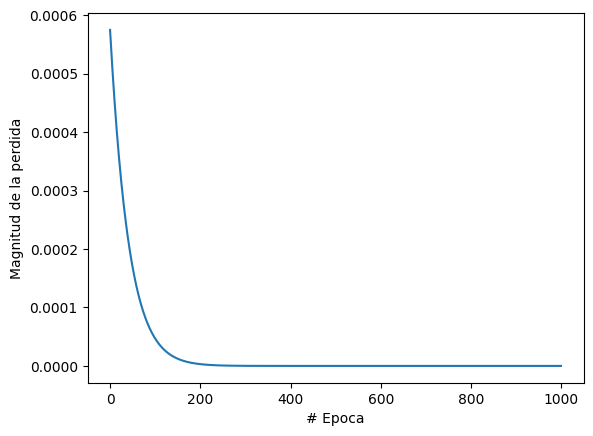

In [11]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la perdida")
plt.plot(entrenamiento.history["loss"])


In [22]:
# Cuando comenzó la historia era muy grande y cuando fue avanzando 
# gracias al optimizador el error ya en la época 200 se acercaba 
# casi a cero.

# Hacemos una predicción:
import numpy as np

c = 1230
prediccion = modelo.predict(np.array([c]))
print(f"Predicción: {c} celsius son {prediccion[0]} fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción: 1230 celsius son [2246.0005] fahrenheit


In [23]:
# Del modelo que hicimos podemos obtener las capas, y los pesos de ellas, veamos:
print(modelo.layers[0].get_weights())

[array([[1.8000004]], dtype=float32), array([31.999954], dtype=float32)]


In [ ]:
# Notar que el cálculo real para convertir celsius a fahrenheit es
# (C * 1.8) + 32

# Este es un caos especial porque la formula de conversión es 
# parece mucho a como funcionan las neuronas y el perceptron 
# lo logra representar perfectamente.

# Backpropagation